In [1]:
import arcpy
from arcgis.gis import GIS
from arcgis.features import SpatialDataFrame
import matplotlib.pyplot as plt

In [2]:
# Define your working directory

arcpy.env.workspace = "./making_graphs_in_arcgis_pro.gdb"

In [3]:
# List the layers in your working directory

fclist = arcpy.ListFeatureClasses()
print(fclist)

['main_election']


In [4]:
# Load the data into a Spatially Enabled Data Frame

sdf = SpatialDataFrame.from_featureclass('main_election')

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\arcgis\features\_data\geodataset\geodataframe.py:221: UserWarning: SpatialDataFrame has been deprecated.  Please switch to the GeoAccessor/GeoSeriesAccessor.
  warnings.warn("SpatialDataFrame has been deprecated.  Please switch to the GeoAccessor/GeoSeriesAccessor.")


In [5]:
# Look at the first five rows

sdf.head()

,OBJECTID,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,...,gop_2012_prc,dem_2012_prc,gop_minus_dem_prc_2012,gop_2016_votes,dem_2016_votes,totalvotes_2016,gop_2016_prc,dem_2016_prc,gop_minus_dem_prc_2016,SHAPE
0,1,39,131,01074078,0500000US39131,39131,Pike,06,1140324458,9567612,...,49.09,49.08,0.01,7902.0,3539.0,11879.0,66.52,29.79,36.73,"{'rings': [[[-83.35353099999998, 39.1975850000..."
1,2,46,003,01266983,0500000US46003,46003,Aurora,06,1834813753,11201379,...,57.43,39.71,17.72,974.0,340.0,1407.0,69.23,24.16,45.07,"{'rings': [[[-98.80777099999995, 43.9352230000..."
2,3,55,035,01581077,0500000US55035,55035,Eau Claire,06,1652211310,18848512,...,42.43,55.95,-13.52,23311.0,27294.0,54885.0,42.47,49.73,-7.26,"{'rings': [[[-91.65045499999997, 44.8559510000..."
3,4,72,145,01804553,0500000US72145,72145,Vega Baja,13,118766803,57805868,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'rings': [[[-66.44898899999998, 18.3872140000..."
4,5,48,259,01383915,0500000US48259,48259,Kendall,06,1715747531,1496797,...,81.58,17.11,64.47,15700.0,3643.0,20120.0,78.03,18.11,59.92,"{'rings': [[[-98.92014699999999, 30.1382900000..."


In [6]:
# Print the columns to the screen

sdf.columns

Index(['OBJECTID', 'STATEFP', 'COUNTYFP', 'COUNTYNS', 'AFFGEOID', 'GEOID',
       'NAME', 'LSAD', 'ALAND', 'AWATER', 'FIPS', 'gop_2000_votes',
       'dem_2000_votes', 'totalvotes_2000', 'gop_2000_prc', 'dem_2000_prc',
       'gop_minus_dem_prc_2000', 'gop_2004_votes', 'dem_2004_votes',
       'totalvotes_2004', 'gop_2004_prc', 'dem_2004_prc',
       'gop_minus_dem_prc_2004', 'gop_2008_votes', 'dem_2008_votes',
       'totalvotes_2008', 'gop_2008_prc', 'dem_2008_prc',
       'gop_minus_dem_prc_2008', 'gop_2012_votes', 'dem_2012_votes',
       'totalvotes_2012', 'gop_2012_prc', 'dem_2012_prc',
       'gop_minus_dem_prc_2012', 'gop_2016_votes', 'dem_2016_votes',
       'totalvotes_2016', 'gop_2016_prc', 'dem_2016_prc',
       'gop_minus_dem_prc_2016', 'SHAPE'],
      dtype='object')

# Making Plots

One simple plot you can make is a scatterplot, to visualize the connections between variables.

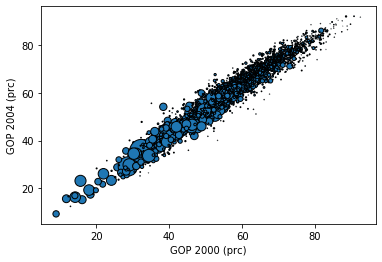

In [7]:
plt.scatter(sdf.gop_2000_prc,sdf.gop_2004_prc,s=sdf.totalvotes_2000/5000,cmap='bwr',edgecolors='k')
plt.xlabel('GOP 2000 (prc)')
plt.ylabel('GOP 2004 (prc)')

# Save figures this way:
plt.savefig('my_figure.png',dpi=300)

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


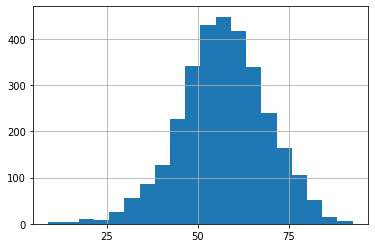

In [8]:
# You can also create histograms of the data

_ = plt.hist(sdf.gop_2000_prc,bins=20)
plt.xticks([25,50,75])
plt.grid('on')

See https://matplotlib.org/gallery/index.html for more kinds of plots that you can make!  Here's one of my favorites:

In [9]:
import numpy as np
from matplotlib.sankey import Sankey

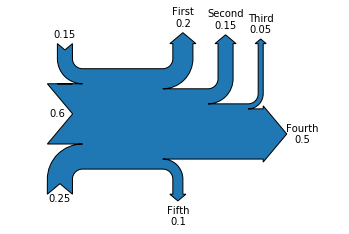

In [10]:
_ = Sankey(flows=[0.25, 0.15, 0.60, -0.20, -0.15, -0.05, -0.50, -0.10],
       labels=['', '', '', 'First', 'Second', 'Third', 'Fourth', 'Fifth'],
       orientations=[-1, 1, 0, 1, 1, 1, 0, -1]).finish()
_ = plt.axis('off')